In [ ]:

import cv2
import numpy as np


def signal_detected(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and help with contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    t_lower = 100 # Lower Threshold
    t_upper = 200 # Upper threshold
    aperture_size = 5 # Aperture size
    L2Gradient = True # Boolean

    # Applying the Canny Edge filter with L2Gradient = True
    edges = cv2.Canny(img, t_lower, t_upper, L2gradient = L2Gradient )
    # Apply Canny edge detection
    #edges = cv2.Canny(blurred, 50, 150)

    # Find contours and hierarchy
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    #print("Contours:\n"+str(contours))

    # Initialize variables to keep track of the contour with the highest hierarchy_info[3] value
    max_parent_index = -1
    max_hierarchy_value = -1


    # Iterate through contours and hierarchy
    for i in range(len(contours)):
        #print (f"Contour: {i}")
        hierarchy_info = hierarchy[0][i]
        cv2.drawContours(img, contours[i], -1, (0,255,0), 1)
        cv2_imshow(img)
        #cv2.waitKey(0)

        # Check if the contour has a parent
        if hierarchy_info[3] != -1:
            # Update the variables if the current contour has a higher hierarchy_info[3] value
            if hierarchy_info[3] > max_hierarchy_value:
                max_hierarchy_value = hierarchy_info[3]
                max_parent_index = i#index starts with 0

    #print ('hierarchy=\n',hierarchy)
    #print (f"Index: {max_parent_index} Value: {max_hierarchy_value}")
    #cv2.waitKey(0)

    # Access the first child contour using hierarchy_info[max_hierarchy_value]
    child_contour = contours[max_parent_index]
    parent_contour = contours[max_parent_index-2]# there are 2 contours in arrow (inner and outer)
    # Calculate the moments for the child contour
    moments = cv2.moments(child_contour)


    # Calculate the centroid coordinates
    if moments['m00'] != 0:
        cx = int(moments['m10'] / moments['m00'])
        cy = int(moments['m01'] / moments['m00'])

        # Draw the original contour in Blue
        img_child=cv2.drawContours(img, [child_contour], -1, (255, 0, 0), 1)
        # Draw the centroid as a blue dot
        cv2.circle(img_child, (cx, cy), 2, (255, 0, 0), -1)
        #print(f"Child Contour: ({cx} , {cy})")
        # Print the area of the first child contour
        area = cv2.contourArea(child_contour)
        #print(f"Area of child Contour {i+1}: {area}")
        cv2_imshow( img_child)
        #cv2.waitKey(0)

    # Calculate the moments for the Parent contour
    moments = cv2.moments(parent_contour)

    # Calculate the centroid coordinates
    if moments['m00'] != 0:
        px = int(moments['m10'] / moments['m00'])
        py = int(moments['m01'] / moments['m00'])

        # Draw the first parent contour in red
        img_parent=cv2.drawContours(img, [parent_contour], -1, (0, 0, 255), 1)
        # Draw the centroid as a red dot
        cv2.circle(img_parent, (px, py), 2, (0, 0, 255), -1)
        #print(f"Parent Contour: ({px} , {py})")
        cv2_imshow( img_parent)
        #cv2.waitKey(0)


    # Print the detection
    dif=cx-px

    # Display the image with contours and centroids
    cv2_imshow( cv2.resize(img, (800, 600)))
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    print("Difference " + str(dif))

    if dif > 0:
        signal = "right"
    else:
        signal = "left"
    print("Centroids " + str(dif))
    return signal

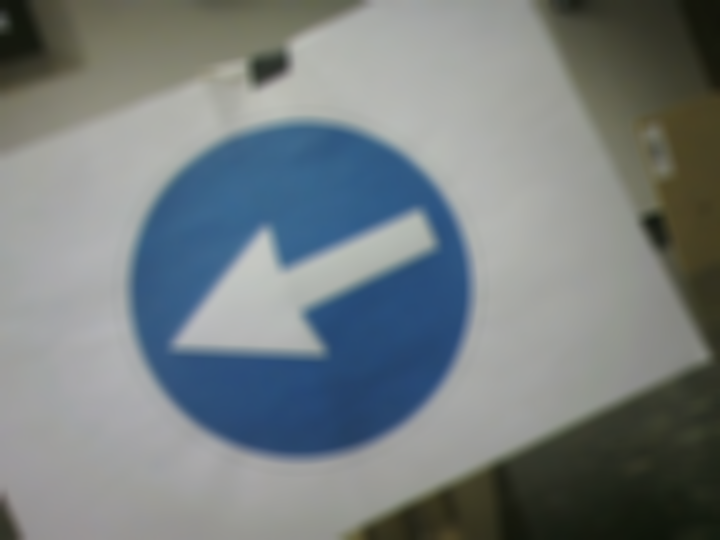

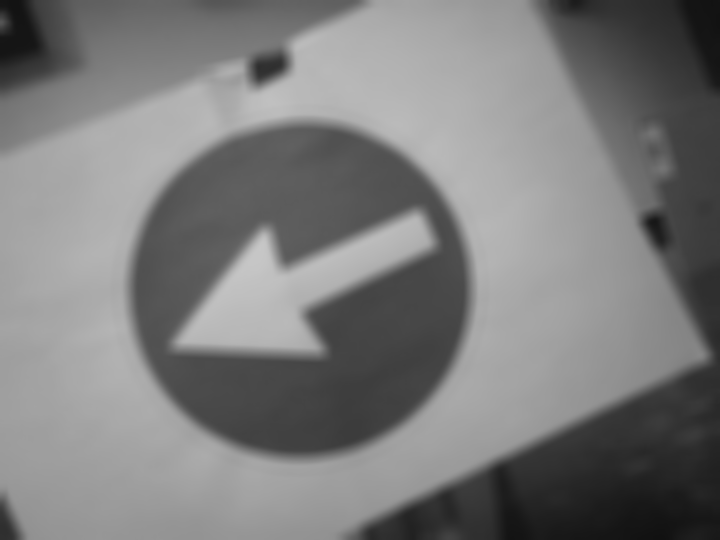

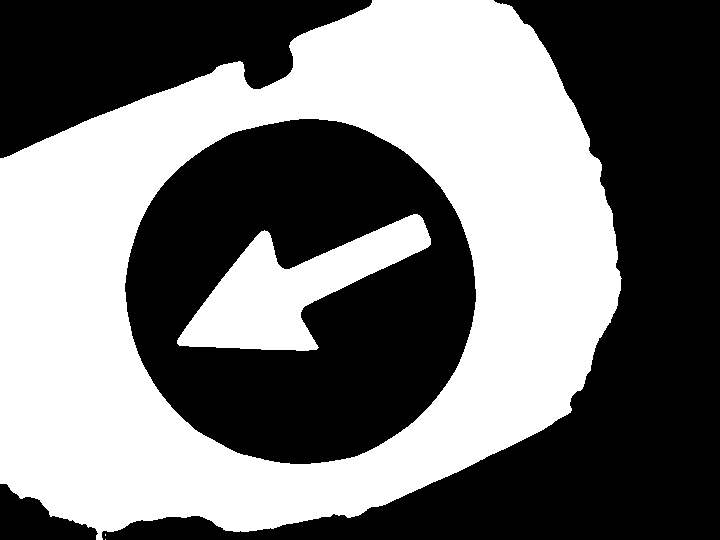

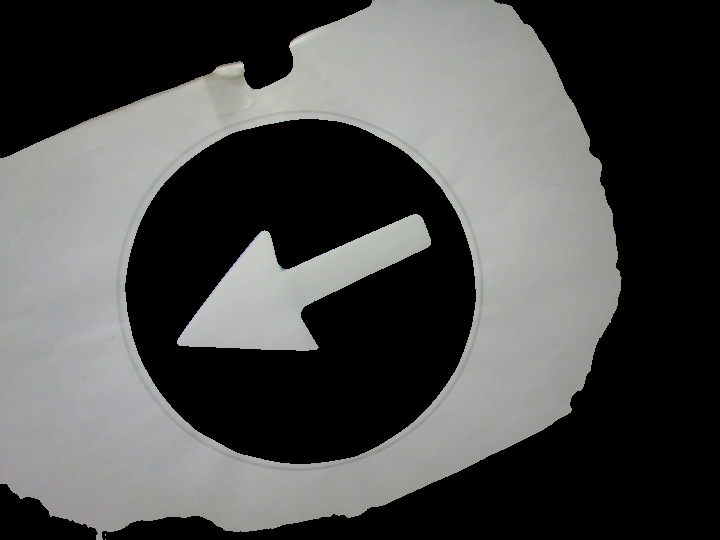

In [ ]:

from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow

# Mount Google Drive
# drive.mount('/content/drive')

# Path to your image in Google Drive
image_path = '/content/AAAFoto7.jpg'

# Load the image using OpenCV
image = cv2.imread(image_path)

height, width = image.shape[:2]

# Calculate the ratio to resize the image width to 720 pixels
resize_ratio = 720 / width

# Resize the image
resized_image = cv2.resize(image, (int(width * resize_ratio), int(height * resize_ratio)))



blurred_image = cv2.GaussianBlur(resized_image, (15, 15), 100)  # Puedes ajustar el tamaño del kernel según sea necesario

cv2_imshow(blurred_image)
# Convierte la imagen a escala de grises
gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
# Aplica la binarización
_, binary_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)
binary_image = cv2.merge((binary_image, binary_image, binary_image))
cv2_imshow(binary_image)

masked_image = cv2.bitwise_and(resized_image, binary_image)
# Display the image
cv2_imshow(masked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
signal_detected2(binary_image)

NameError: name 'signal_detected2' is not defined

In [ ]:
import cv2
import numpy as np

# Path to your image
image_path = '/content/AAAFoto1.jpg'

# Load the image using OpenCV
image = cv2.imread(image_path)

# Resize the image
height, width = image.shape[:2]
resize_ratio = 720 / width
resized_image = cv2.resize(image, (int(width * resize_ratio), int(height * resize_ratio)))

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(resized_image, (15, 15), 100)

# Convert the image to grayscale
gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)

# Create masks for red, blue, and white colors
red_mask = cv2.inRange(resized_image, (0, 0, 200), (100, 100, 255))
blue_mask = cv2.inRange(resized_image, (200, 0, 0), (255, 100, 100))
white_mask = cv2.inRange(resized_image, (200, 200, 200), (255, 255, 255))

# Combine masks
color_mask = cv2.bitwise_or(cv2.bitwise_or(red_mask, blue_mask), white_mask)

# Invert the binary image
color_mask_inv = cv2.bitwise_not(color_mask)

# Apply the mask to the original image
masked_image = cv2.bitwise_and(resized_image, resized_image, mask=color_mask_inv)

# Display the image
cv2_imshow(masked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


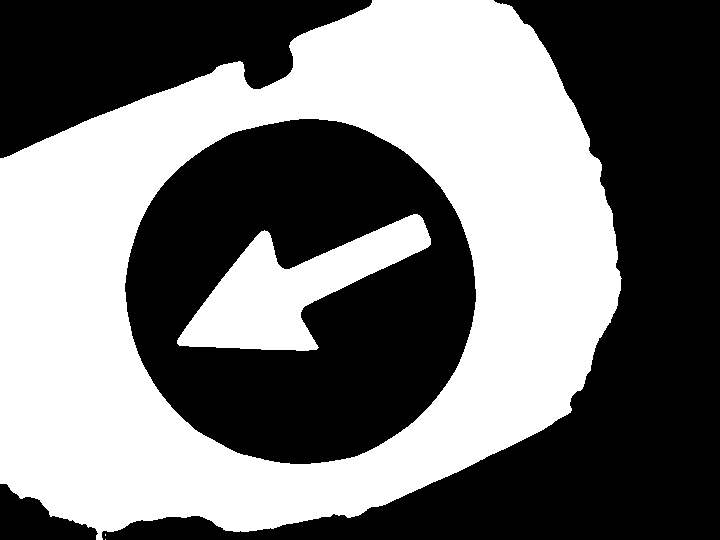

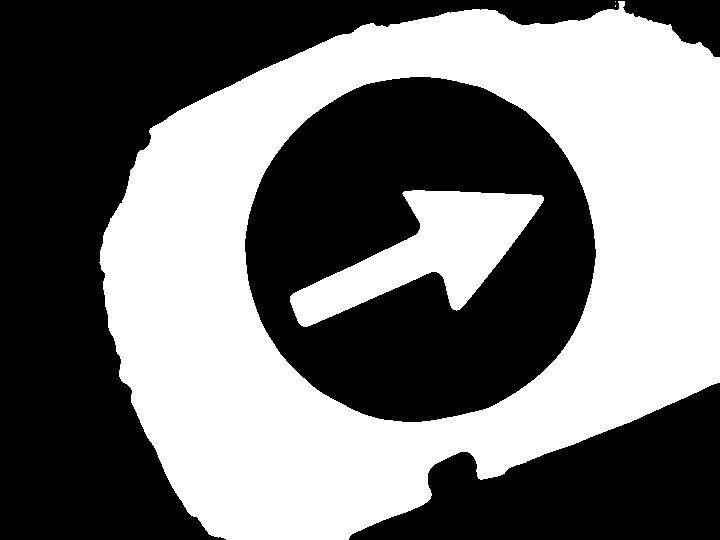

In [ ]:
def rotate_image_180(image):
    # Get image dimensions
    height, width = image.shape[:2]

    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 180, 1)

    # Apply the rotation to the image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    return rotated_image

# Example usage

rotated_image = rotate_image_180(binary_image)

# Display the original and rotated images
cv2_imshow(binary_image)
cv2_imshow( rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Difference: -6


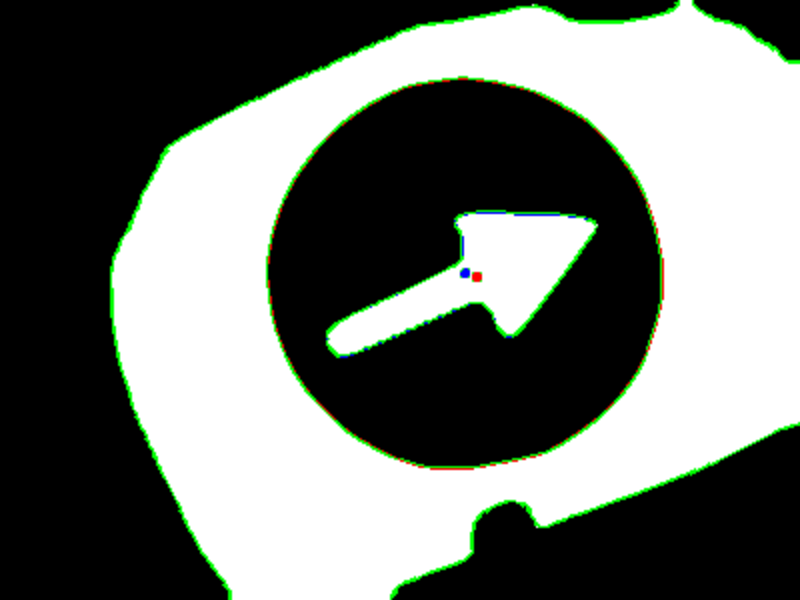

Signal: left
left
Difference: -91


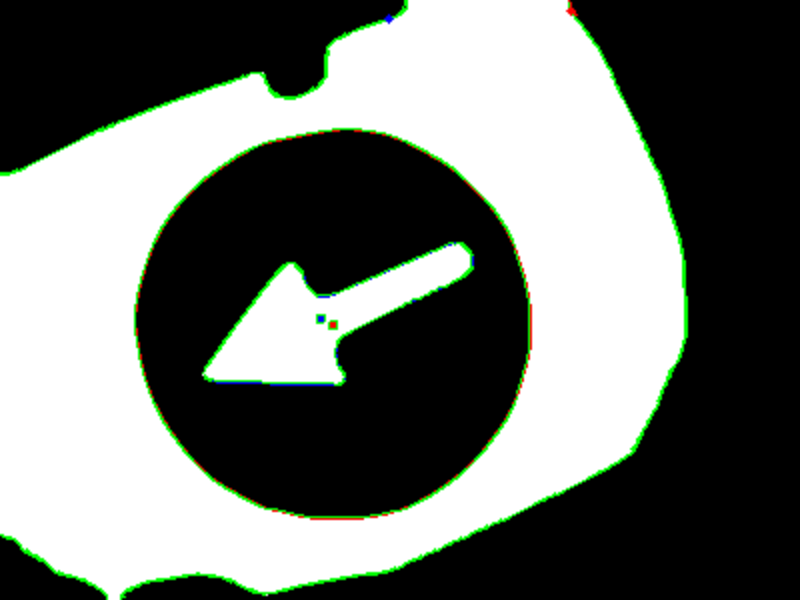

Signal: left
left


In [ ]:
print(signal_detected2(rotated_image))
print(signal_detected2(binary_image))# - parox poly dc

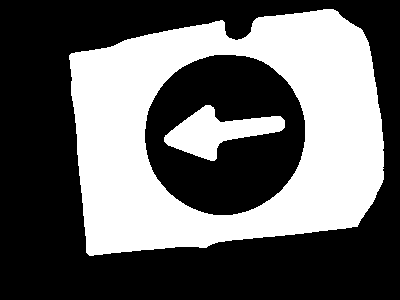

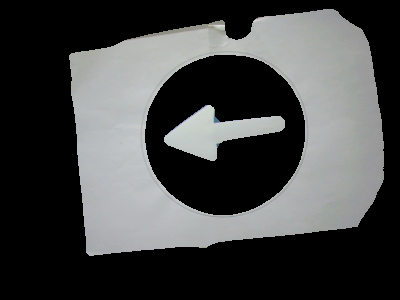

Difference: -8


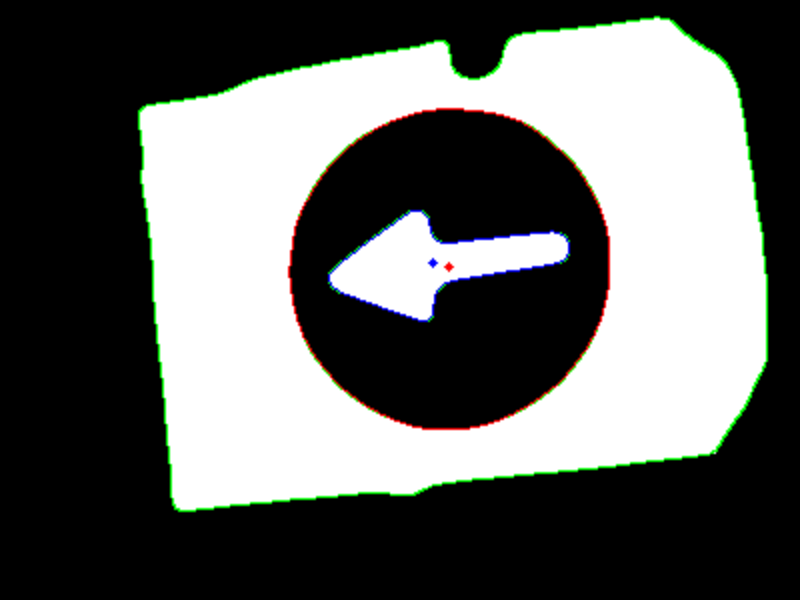

Signal: left
left
Difference: 8


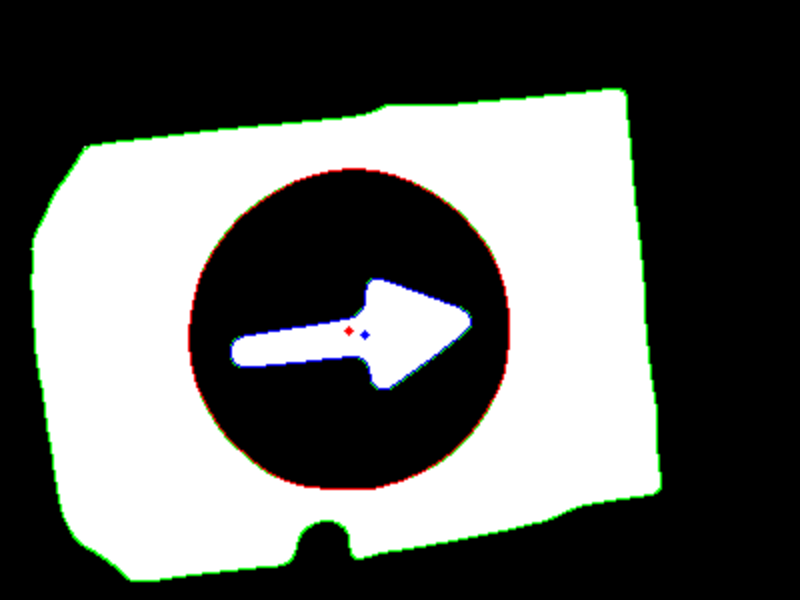

Signal: right
right


In [ ]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow

# Mount Google Drive
# drive.mount('/content/drive')

# Path to your image in Google Drive
image_path = '/content/AAAFoto4.jpg'

# Load the image using OpenCV
image = cv2.imread(image_path)

height, width = image.shape[:2]

# Calculate the ratio to resize the image width to 720 pixels
resize_ratio = 400 / width

# Resize the image
resized_image = cv2.resize(image, (int(width * resize_ratio), int(height * resize_ratio)))



blurred_image = cv2.GaussianBlur(resized_image, (15, 15), 100)  # Puedes ajustar el tamaño del kernel según sea necesario


# Convierte la imagen a escala de grises
gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)

# Aplica la binarización
_, binary_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)

binary_image = cv2.merge((binary_image, binary_image, binary_image))
cv2_imshow(binary_image)

masked_image = cv2.bitwise_and(resized_image, binary_image)
# Display the image
cv2_imshow(masked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

rotated_image = rotate_image_180(binary_image)
print(signal_detected2(binary_image))
print(signal_detected2(rotated_image))


Difference: -6


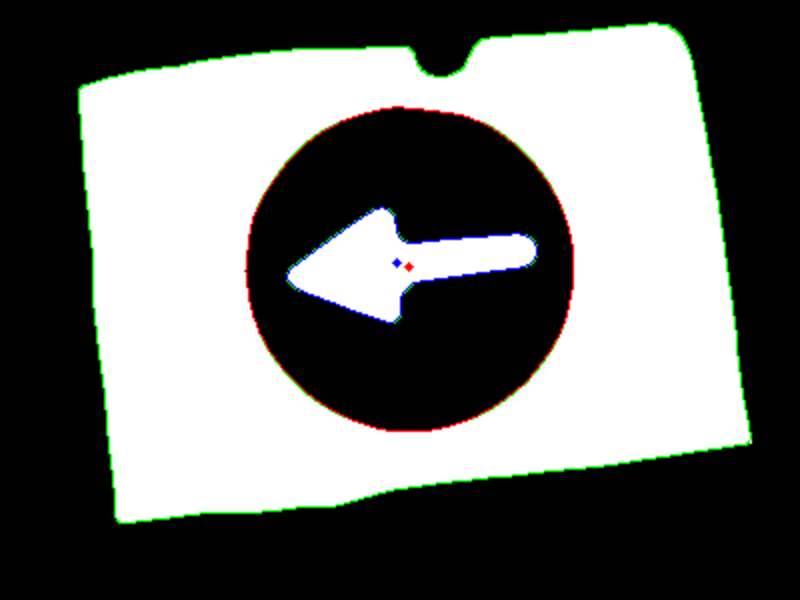

Signal: left
Difference: 1


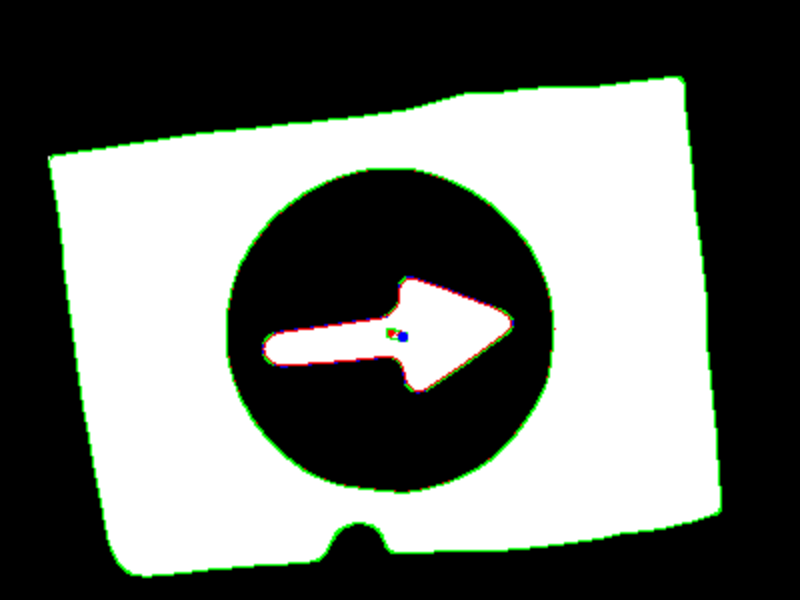

Signal: right
Difference: -230


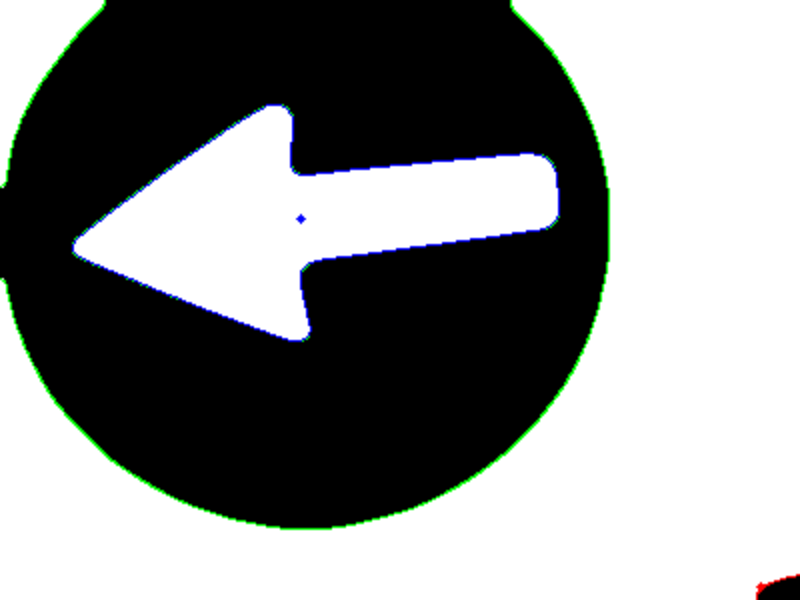

Signal: left
Difference: 1


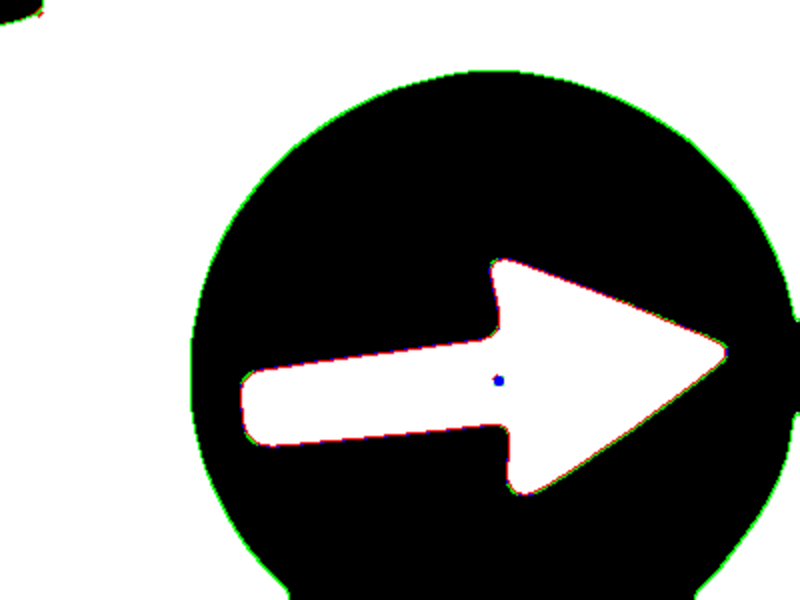

Signal: right
Difference: -198


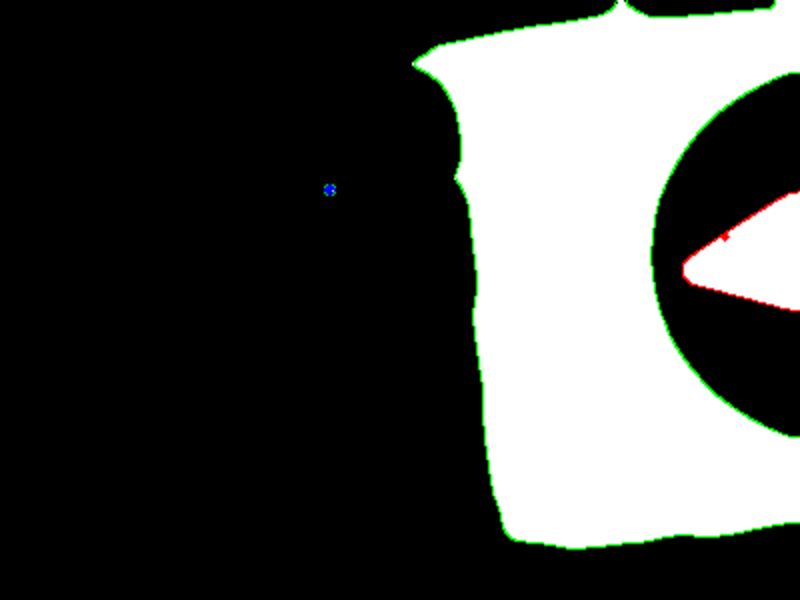

Signal: left
Difference: -5


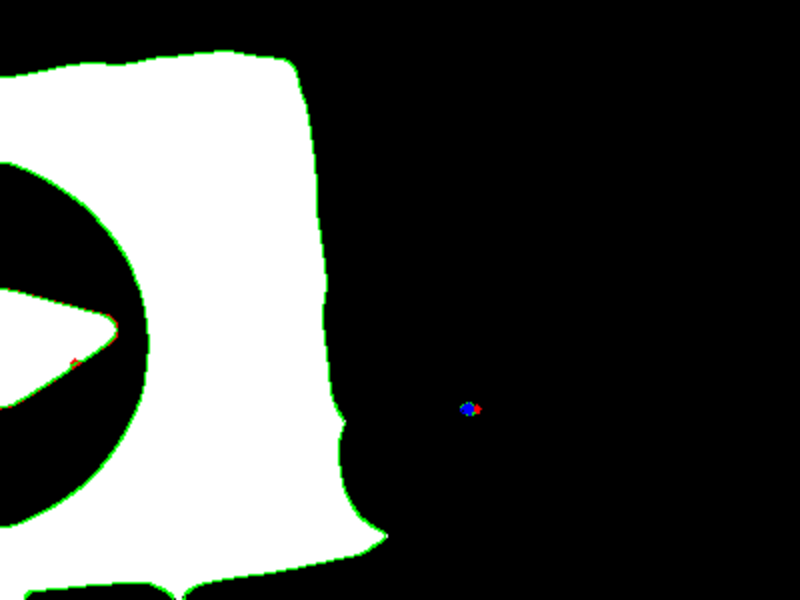

Signal: left
Difference: -8


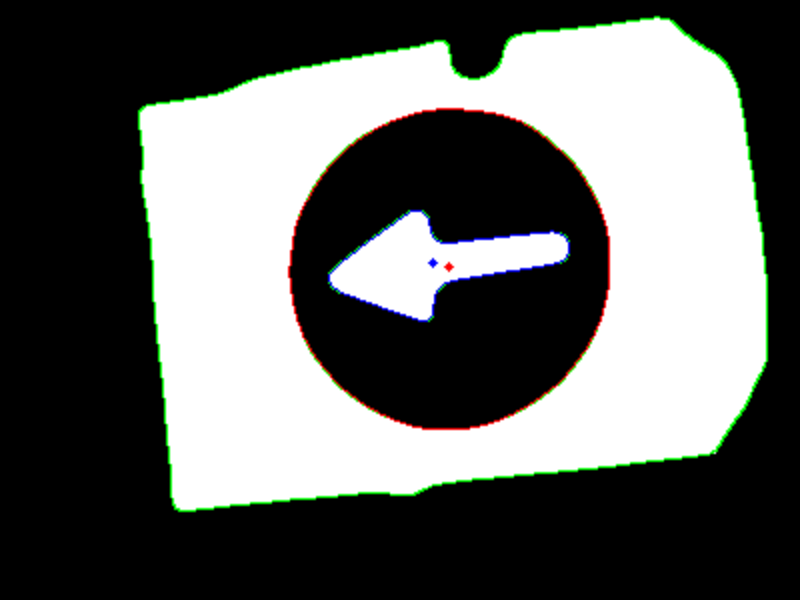

Signal: left
Difference: -6


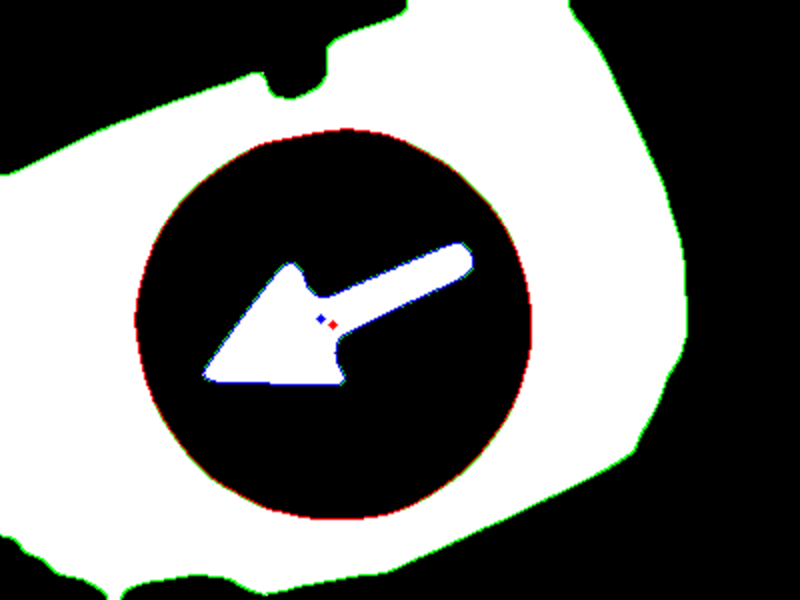

Signal: left
Difference: 1


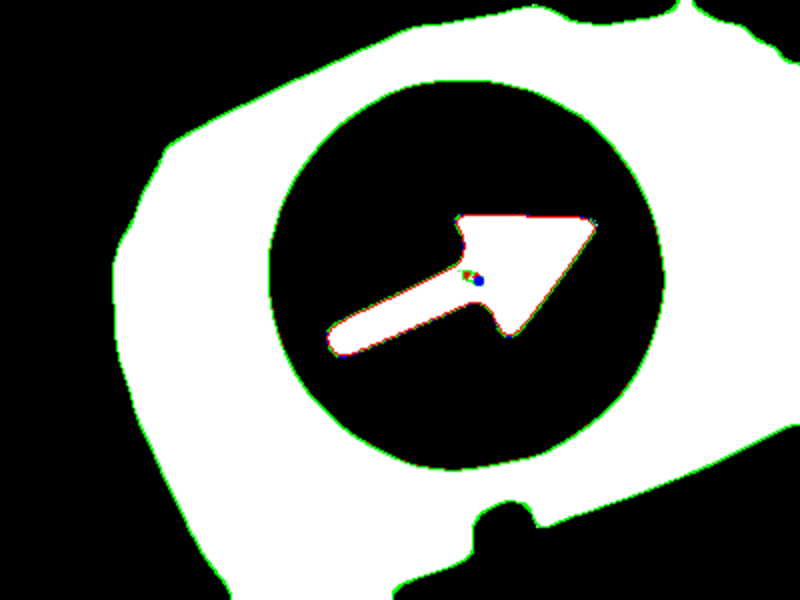

Signal: right


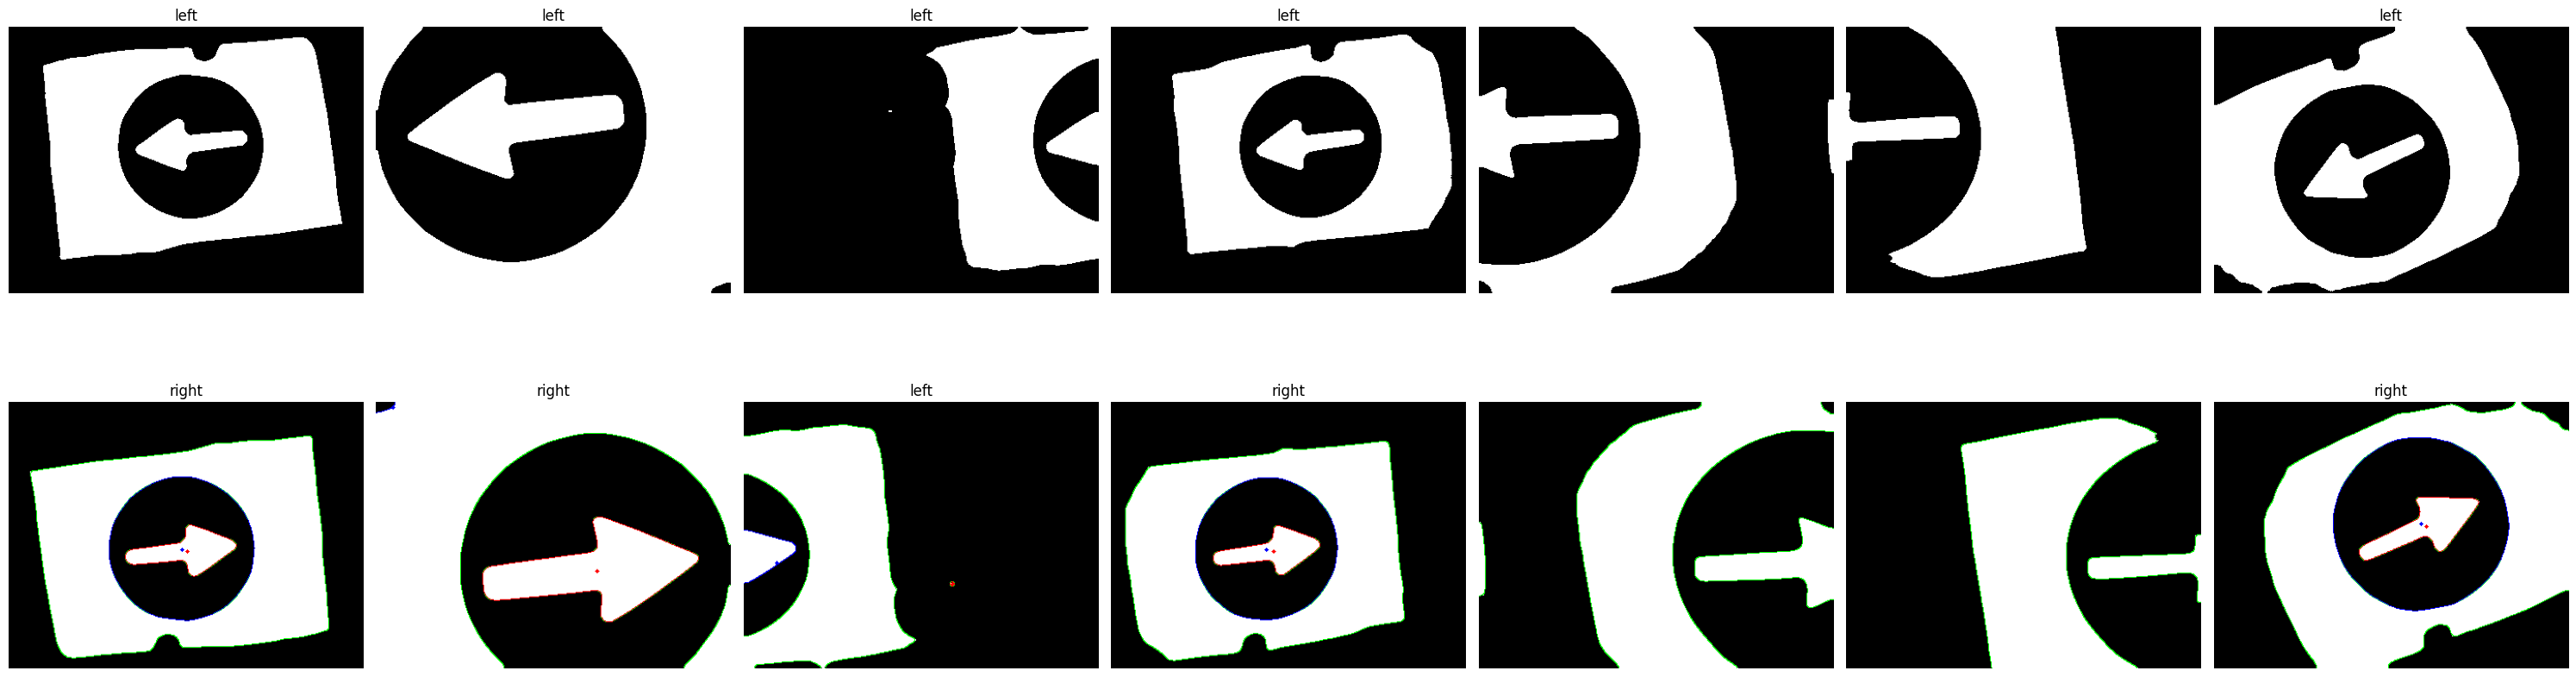

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def cv2_show(image, title=''):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def rotate_image_180(image):
    return cv2.rotate(image, cv2.ROTATE_180)



# Load and preprocess your image
base_path = '/content/AAAFoto{}.jpg'
images = []
for i in range(1, 8):
    image_path = base_path.format(i)
    image = cv2.imread(image_path)
    height, width = image.shape[:2]
    resize_ratio = 400 / width
    resized_image = cv2.resize(image, (int(width * resize_ratio), int(height * resize_ratio)))
    blurred_image = cv2.GaussianBlur(resized_image, (15, 15), 100)  # Puedes ajustar el tamaño del kernel según sea necesario


    # Convierte la imagen a escala de grises
    gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)

    # Aplica la binarización
    _, binary_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)

    binary_image = cv2.merge((binary_image, binary_image, binary_image))

    images.append(binary_image)

# Create a subplot for each image and its rotated version
fig, axs = plt.subplots(2, 7, figsize=(30, 10))

# Loop through each image
for i in range(7):
    # Original Image
    axs[0, i].imshow(images[i])
    axs[0, i].set_title(signal_detected2(images[i]))
    axs[0, i].axis('off')

    # Rotated Image
    rotated = rotate_image_180(images[i])
    axs[1, i].imshow(rotated)
    if i==3 :
        axs[1, i].set_title("right")
    else:
        axs[1, i].set_title(signal_detected2(rotated))
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np

def signal_detected2(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #gray=img

    # Apply GaussianBlur to reduce noise and help with contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 20)

    # Applying the Canny Edge filter
    edges = cv2.Canny(blurred, 100, 200, apertureSize=5, L2gradient=True)

    # Find contours and hierarchy
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    # Initialize variables to keep track of the contour with the highest hierarchy_info[3] value
    max_parent_index = -1
    max_hierarchy_value = -1

    # Iterate through contours and hierarchy
    for i, (contour, hierarchy_info) in enumerate(zip(contours, hierarchy[0])):
        cv2.drawContours(img, contour, -1, (0, 255, 0), 1)

        # Check if the contour has a parent
        if hierarchy_info[3] != -1:
            # Update the variables if the current contour has a higher hierarchy_info[3] value
            if hierarchy_info[3] > max_hierarchy_value:
                max_hierarchy_value = hierarchy_info[3]
                max_parent_index = i

    # Access the parent contour and child contour
    parent_contour = contours[max_parent_index - 2] if max_parent_index >= 2 else None
    child_contour = contours[max_parent_index] if max_parent_index != -1 else None

    px=0

    # Calculate the moments for the parent contour
    if parent_contour is not None:
        moments = cv2.moments(parent_contour)
        if moments['m00'] != 0:
            px = int(moments['m10'] / moments['m00'])
            py = int(moments['m01'] / moments['m00'])

            # Draw the parent contour in red
            cv2.drawContours(img, [parent_contour], -1, (0, 0, 255), 1)
            # Draw the centroid as a red dot
            cv2.circle(img, (px, py), 2, (0, 0, 255), -1)

    # Calculate the moments for the child contour
    if child_contour is not None:
        moments = cv2.moments(child_contour)
        if moments['m00'] != 0:
            cx = int(moments['m10'] / moments['m00'])
            cy = int(moments['m01'] / moments['m00'])

            # Draw the child contour in blue
            cv2.drawContours(img, [child_contour], -1, (255, 0, 0), 1)
            # Draw the centroid as a blue dot
            cv2.circle(img, (cx, cy), 2, (255, 0, 0), -1)

            # Print the detection
            dif = cx - px if parent_contour is not None else 0
            print("Difference: " + str(dif))

            # Display the image with contours and centroids
            cv2_imshow(cv2.resize(img, (800, 600)))
            cv2.waitKey(0)
            cv2.destroyAllWindows()

            # Determine the signal direction
            signal = "right" if dif > 0 else "left"
            print("Signal: " + signal)

            return signal

    return None


